In [12]:
import sys
sys.path.append("/scratch/m/murray/dtolgay/")
from tools import functions_readfiles as readfiles
from tools import constants

import numpy as np
import pandas as pd 

import h5py

import matplotlib
import matplotlib.pyplot as plt

In [22]:
def read_gas_particles_from_hdf5(file_path: str) -> pd.DataFrame:
    
    with h5py.File(file_path, 'r') as f:
        part_group = f['PartType0']

        # Load vector quantities
        p = part_group['p'][:]   # shape (N, 3)
        v = part_group['v'][:]

        # Load scalar quantities
        m = part_group['m'][:]
        rho = part_group['rho'][:]
        h = part_group['h'][:]
        sfr = part_group['sfr'][:]
        u = part_group['u'][:]
        T = part_group['T'][:]
        hden = part_group['hden'][:]
        isrf = part_group['isrf_skirt'][:] 
        z = part_group['z'][:]          # shape (N, 11)
        Nh = part_group['Nh'][:]

    # Build dataframe
    df = pd.DataFrame({
        'x': p[:, 0],
        'y': p[:, 1],
        'z': p[:, 2],
        'vx': v[:, 0],
        'vy': v[:, 1],
        'vz': v[:, 2],
        'mass': m,
        'density': rho,
        'Nh': Nh,
        'smoothing_length': h,
        'star_formation_rate': sfr,
        'internal_energy': u,
        'temperature': T,
        'hden': hden,
        'isrf': isrf,
        'metallicity': z[:, 0],
        'He_mass_fraction': z[:, 1],
        'C_mass_fraction': z[:, 2],
        'N_mass_fraction': z[:, 3],
        'O_mass_fraction': z[:, 4],
        'Ne_mass_fraction': z[:, 5],
        'Mg_mass_fraction': z[:, 6],
        'Si_mass_fraction': z[:, 7],
        'S_mass_fraction': z[:, 8],
        'Ca_mass_fraction': z[:, 9],
        'Fe_mass_fraction': z[:, 10],
    })

    return df

In [23]:
galaxy_name = "gal0"
galaxy_type = "firebox"
redshift = "0.0"
directory_name = "voronoi_1e6"

# Read cloudy gas particles 
cloudy_gas_particles = readfiles.read_cloudy_gas_particles(
    galaxy_name = galaxy_name,
    galaxy_type = galaxy_type,
    redshift = redshift,
    directory_name = directory_name,
    base_fdir = f"/scratch/m/murray/dtolgay/post_processing_fire_outputs/skirt/runs_hden_radius"

)


hdf5_files = {
    "hx1" : {
        "file_path" : f"/scratch/m/murray/dtolgay/post_processing_fire_outputs/chimes/hdf5_files/{galaxy_type}/z{redshift}/{galaxy_name}/gal0.hdf5",
        "data": pd.DataFrame(),
        "label": "hx1",
    }, 
    "hx0.1": {
        "file_path" : f"/scratch/m/murray/dtolgay/post_processing_fire_outputs/chimes/hdf5_files/{galaxy_type}/z{redshift}/{galaxy_name}/gal0_hx0.10.hdf5",
        "data": pd.DataFrame(),
        "label": "hx0.1",
    }, 
    "hx0.01": {
        "file_path" : f"/scratch/m/murray/dtolgay/post_processing_fire_outputs/chimes/hdf5_files/{galaxy_type}/z{redshift}/{galaxy_name}/gal0_hx0.01.hdf5",
        "data": pd.DataFrame(),
        "label": "hx0.01",
    },

}

for key, value in hdf5_files.items():
    file_path = value["file_path"]
    data = read_gas_particles_from_hdf5(file_path)
    hdf5_files[key]["data"] = data

# # Read the hdf5 file 
# hdf5_file_path = f"/scratch/m/murray/dtolgay/post_processing_fire_outputs/chimes/doga/hdf5_files/{galaxy_type}/z{redshift}/{galaxy_name}/gal0.hdf5"
# hdf5_file = read_gas_particles_from_hdf5(file_path = hdf5_file_path)


/scratch/m/murray/dtolgay/tools/functions_readfiles.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cloudy_gas_particles = pd.read_csv(


In [14]:
# Read the gas particles 

base_dir = "/scratch/m/murray/dtolgay/post_processing_fire_outputs/skirt/runs_hden_radius"
file_name = "abundance_RBFInterpolator_smoothingLength.txt"
fdir = f'{base_dir}/{galaxy_type}/z{redshift}/{galaxy_name}/{directory_name}/{file_name}'

gas, file_specific_columns = readfiles.read_interpolated_files_usingFilePath(path = fdir, interpolation_type="abundance")

# Calculate mass densities
gas['density_h2'] = gas['density'] / constants.mu_h  * gas['fh2'] # gr/cm3
gas['density_co'] = gas['density'] / constants.mu_h  * gas['fCO'] # gr/cm3

# calcuulate the mass 
gas['volume'] = gas['mass'] / (gas['density'] * constants.gr2M_sun) # cm3
gas['mass_h2'] = gas['density_h2'] * gas['volume'] # gr
gas['mass_co'] = gas['density_co'] * gas['volume'] # gr

# Comparing galaxy images

Plotting galaxy
Plotting galaxy


Text(0, 0.5, 'z')

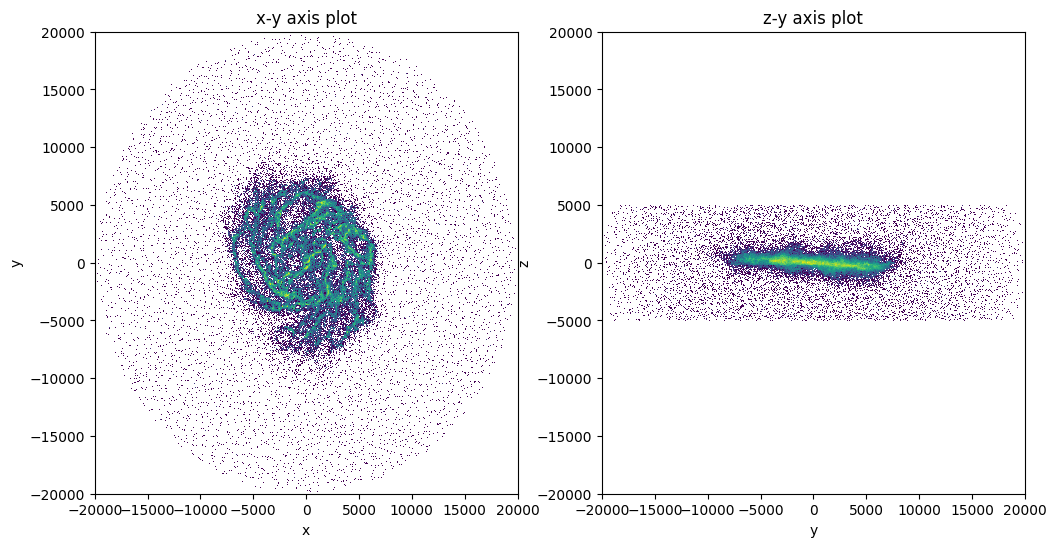

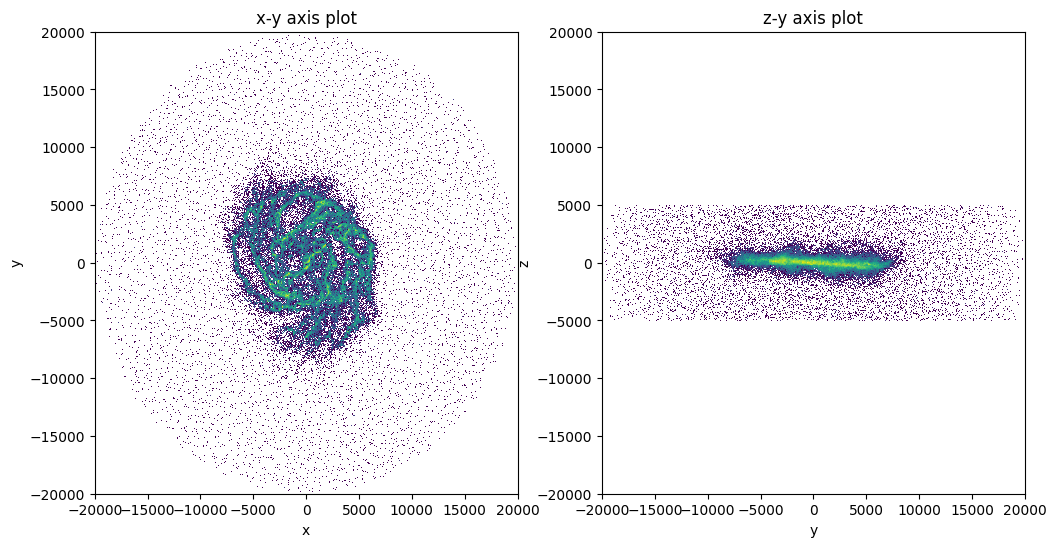

In [16]:
#################################### cloudy_gas_particles
R_max = 20e3 # kpc

print("Plotting galaxy")
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# First subplot: x-y axis plot
axs[0].hist2d(
    x=cloudy_gas_particles["x"],
    y=cloudy_gas_particles["y"],
    bins=500,
    norm=matplotlib.colors.LogNorm(),
    range=[[-R_max, R_max], [-R_max, R_max]]
)
axs[0].set_title('x-y axis plot')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Second subplot: z-y axis plot
axs[1].hist2d(
    x=cloudy_gas_particles["y"],  # Use the 'y' column for the x-axis
    y=cloudy_gas_particles["z"],  # Keep the 'z' column for the y-axis
    bins=500,
    norm=matplotlib.colors.LogNorm(),
    range=[[-R_max, R_max], [-R_max, R_max]]
)
axs[1].set_title('z-y axis plot')
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')








#################################### hdf5_file
R_max = 20e3 # kpc

print("Plotting galaxy")
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed


selected_hdf5_file = hdf5_files["hx1"]["data"] 

# First subplot: x-y axis plot
axs[0].hist2d(
    x=selected_hdf5_file["x"],
    y=selected_hdf5_file["y"],
    bins=500,
    norm=matplotlib.colors.LogNorm(),
    range=[[-R_max, R_max], [-R_max, R_max]]
)
axs[0].set_title('x-y axis plot')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Second subplot: z-y axis plot
axs[1].hist2d(
    x=selected_hdf5_file["y"],  # Use the 'y' column for the x-axis
    y=selected_hdf5_file["z"],  # Keep the 'z' column for the y-axis
    bins=500,
    norm=matplotlib.colors.LogNorm(),
    range=[[-R_max, R_max], [-R_max, R_max]]
)
axs[1].set_title('z-y axis plot')
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')

# Comparing galaxy properties

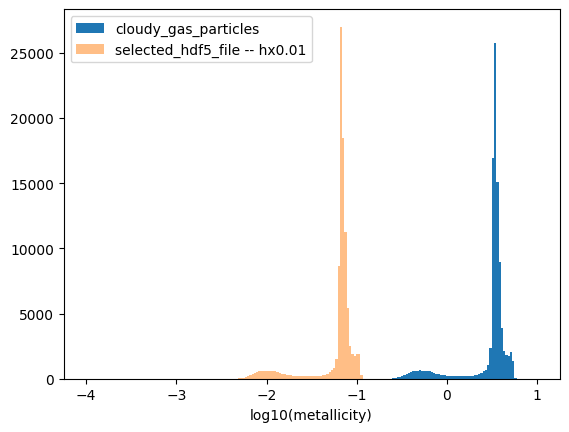

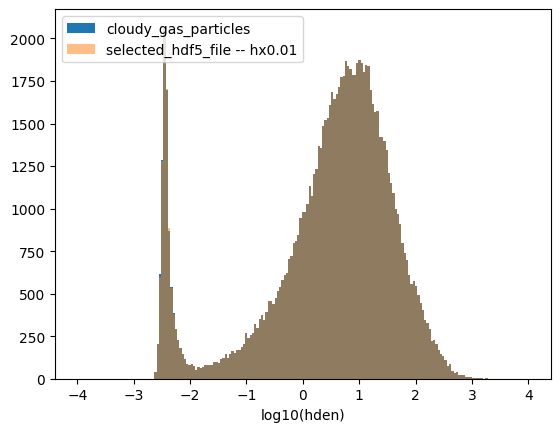

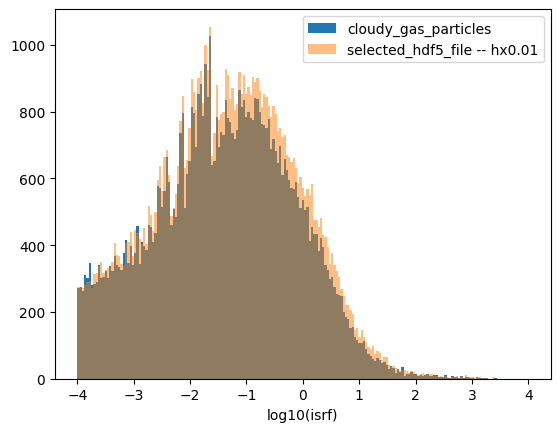

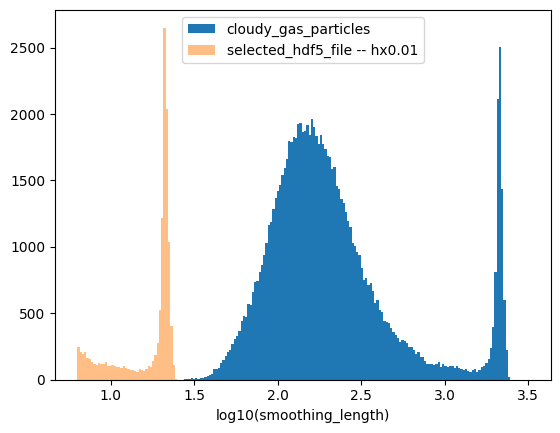

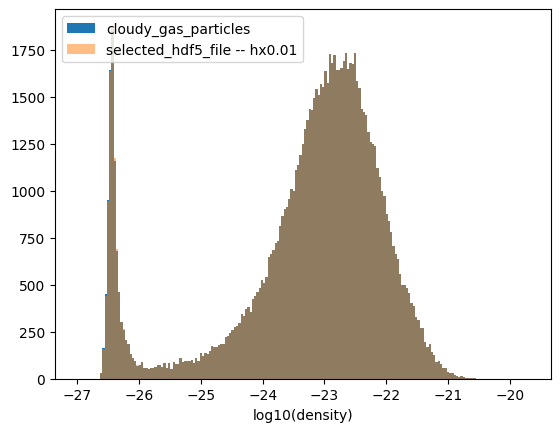

In [21]:
# Histogram plots of the centers 
centers = {
    "metallicity": {
        "min": -4.0,
        "max": 1,
        "ratio": 10**(1.48)
    },
    "hden": {
        "min": -4.0,
        "max": 4.0,
        "ratio": 10**(0.55)                        
    },
    "isrf": {
        "min": -4.0,
        "max": 4.0,
        "ratio": 10**(-1.73)        
    },
    "smoothing_length": {
        "min": 0.8,
        "max": 3.5
    },
    "density": {
        "min": -27.0,
        "max": -19.7,
        "ratio": 10**(0.65)                
    }
}

selected_hdf5_file_key = "hx0.01"
selected_hdf5_file = hdf5_files[selected_hdf5_file_key]["data"]

for column in centers.keys(): 
    plt.figure()

    bins = np.linspace(start=centers[column]['min'], stop=centers[column]['max'], num=200)
    
        
    plt.hist(np.log10(cloudy_gas_particles[column]), label="cloudy_gas_particles", bins=bins, alpha=1)
    plt.hist(np.log10(selected_hdf5_file[column]), label=f"selected_hdf5_file -- {selected_hdf5_file_key}", bins=bins, alpha=0.5)
    plt.legend()
    plt.xlabel(f"log10({column})")

        
    plt.show()

# Contolling the other parameters

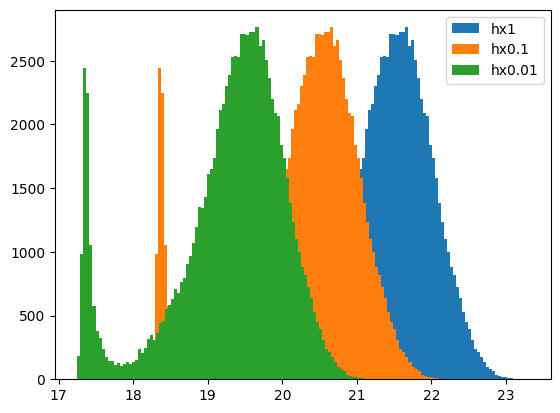

In [27]:
for key, value in hdf5_files.items():
    data = value["data"]

    plt.hist(
        np.log10(data['Nh']), 
        bins = 100, 
        label = value["label"],
    )

plt.legend()